In [1]:
# Import Library Dependencies
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

# Import Custom API Functions
from apidata import quandl_stock_data

%matplotlib notebook

In [2]:
# Portfolio Stock Selection
pfolio_assets = ["F", "GOOG", "amzn"]
print(f'Number of Portfolio Assets: {len(pfolio_assets)}')

Number of Portfolio Assets: 3


In [3]:
# Initializing DataFrame
portfolio = quandl_stock_data(pfolio_assets[0], verbose=True) \
            .rename(columns={"Close": pfolio_assets[0].upper()})[pfolio_assets[0].upper()] \
            .reset_index()


[Quandl] Query API Summary:

--------------------------------------------------------------------------- 

- symbol: F
- start_date: 2014-01-01
- end_date: 2019-01-01
- collapse: monthly
- data_type: pandas

 --------------------------------------------------------------------------- 


[Preview] Response DataFrame


              Open   High    Low  Close      Volume
Date                                              
2014-01-02  15.42  15.45  15.28  15.44  31528500.0
2014-01-03  15.52  15.64  15.30  15.51  46122300.0
2014-01-06  15.72  15.76  15.52  15.58  42657600.0
2014-01-07  15.73  15.74  15.35  15.38  54476300.0
2014-01-08  15.60  15.71  15.51  15.54  48448300.0
2014-01-09  15.83  16.02  15.77  15.84  67836500.0
2014-01-10  16.01  16.11  15.94  16.07  44984000.0
2014-01-13  16.37  16.53  16.08  16.11  57566400.0
2014-01-14  16.31  16.43  16.17  16.40  44039200.0
2014-01-15  16.37  16.73  16.35  16.70  64118200.0 

-----------------------------------------------------------------

In [4]:
# Generate Portfolio DataFrame:
# [1] Query Stock Return Data - Quandl API Call
# [2] Merge Stock Returns into Portfolio DataFrame 

for i, stock in enumerate(pfolio_assets[1:]):
    print(f"<Quandl API Call> [{i+1}] Stock Symbol: {stock}")
    add_stock = quandl_stock_data(stock) \
                .rename(columns={"Close": stock})[stock] \
                .reset_index()
    
    portfolio = pd.merge(portfolio, add_stock, on="Date", how="inner")
    
print (f"\nAsset Returns: Merged // Portfolio DataFrame: <Complete>")

<Quandl API Call> [1] Stock Symbol: GOOG
<Quandl API Call> [2] Stock Symbol: amzn

Asset Returns: Merged // Portfolio DataFrame: <Complete>


In [5]:
# Set DataFrame Index (Date)
portfolio.set_index("Date", inplace=True)
portfolio.head(15)

,F,GOOG,amzn
Date,,,
2014-03-27,15.25,558.46,338.470
2014-03-28,15.45,559.99,338.290
2014-03-31,15.60,556.97,336.365
2014-04-01,16.32,567.16,342.990
2014-04-02,16.46,567.00,341.960
2014-04-03,16.39,569.74,333.620
2014-04-04,16.13,543.14,323.000
2014-04-07,15.94,538.15,317.760
2014-04-08,16.10,554.90,327.070


In [6]:
# View DataFrame -- Data Completeness
portfolio.count()

F       1006
GOOG    1006
amzn    1006
dtype: int64

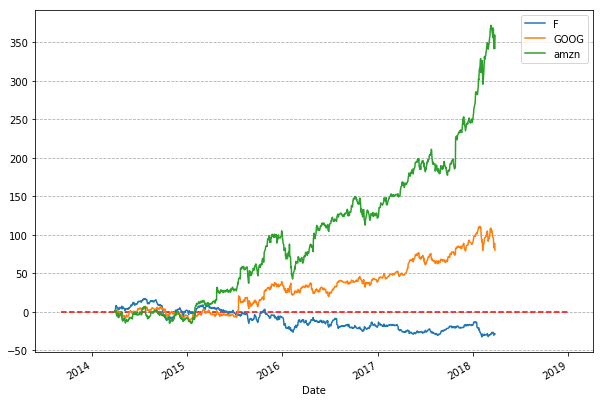

In [13]:
# [Visualize] Plot Data Frame -- Closing Prices
visual_plot = ((portfolio/portfolio.iloc[0] * 100) - 100).plot(figsize=(10,7))
plt.grid(axis="y", linestyle="dashed")
plt.hlines(0, "2013-09-01", "2019-01-01", linestyle="dashed", color="red")

In [14]:
# Convert Stock Price Data into Log Returns -- Removed Offset Row
log_returns = np.log(portfolio / portfolio.shift(1)).iloc[1:]
log_returns[:15]

,F,GOOG,amzn
Date,,,
2014-03-28,0.013030,0.002736,-0.000532
2014-03-31,0.009662,-0.005408,-0.005707
2014-04-01,0.045120,0.018130,0.019504
2014-04-02,0.008542,-0.000282,-0.003008
2014-04-03,-0.004262,0.004821,-0.024691
2014-04-04,-0.015991,-0.047813,-0.032350
2014-04-07,-0.011849,-0.009230,-0.016356
2014-04-08,0.009988,0.030651,0.028878
2014-04-09,-0.016281,0.016515,0.014373


In [15]:
# Calculate Average Annual Log Returns 
log_returns.mean()*250

F      -0.085139
GOOG    0.146184
amzn    0.369855
dtype: float64

In [16]:
# Portfolio Asset Covariance Matrix
log_returns.cov() * 250

,F,GOOG,amzn
F,0.052157,0.016806,0.018396
GOOG,0.016806,0.050542,0.038869
amzn,0.018396,0.038869,0.083850


In [17]:
# Portfolio Asset Correlation Matrix
log_returns.corr()

,F,GOOG,amzn
F,1.000000,0.327334,0.278170
GOOG,0.327334,1.000000,0.597074
amzn,0.278170,0.597074,1.000000


In [18]:
# Count Number of Assets in Portfolio
num_assets = (len(pfolio_assets) )
num_assets

3

In [19]:
# Simulate 10k Random Portfolios
pfolio_sims = []
pfolio = {}

mkt_return = .098
sim_trials = 2500
for i in range(sim_trials):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    WTSp = zip(pfolio_assets, weights)
    RTNp = np.sum(weights * log_returns.mean()) * 250
    VOLp = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    
    pfolio = {a:round(wt, 4) for a,wt in WTSp}
    pfolio["RTN"] = round(RTNp, 4)
    pfolio["VOL"] = round(VOLp, 4)
    pfolio["Sharpe"] = round((RTNp - mkt_return)/VOLp, 4)
    pfolio_sims.append(pfolio)
    
    print("\n",pfolio, "\n")

print(">>> Data Points Generated -- Simulation Complete <<<")


 {'F': 0.6569, 'GOOG': 0.298, 'amzn': 0.045, 'RTN': 0.0043, 'VOL': 0.1894, 'Sharpe': -0.4947} 


 {'F': 0.3909, 'GOOG': 0.2664, 'amzn': 0.3427, 'RTN': 0.1324, 'VOL': 0.1922, 'Sharpe': 0.179} 


 {'F': 0.1979, 'GOOG': 0.6648, 'amzn': 0.1373, 'RTN': 0.1311, 'VOL': 0.1962, 'Sharpe': 0.1688} 


 {'F': 0.384, 'GOOG': 0.0854, 'amzn': 0.5306, 'RTN': 0.176, 'VOL': 0.2093, 'Sharpe': 0.3729} 


 {'F': 0.4014, 'GOOG': 0.5863, 'amzn': 0.0123, 'RTN': 0.0561, 'VOL': 0.1856, 'Sharpe': -0.2258} 


 {'F': 0.4675, 'GOOG': 0.0216, 'amzn': 0.5109, 'RTN': 0.1523, 'VOL': 0.2081, 'Sharpe': 0.261} 


 {'F': 0.4607, 'GOOG': 0.1069, 'amzn': 0.4323, 'RTN': 0.1363, 'VOL': 0.1998, 'Sharpe': 0.1918} 


 {'F': 0.4142, 'GOOG': 0.2657, 'amzn': 0.3201, 'RTN': 0.122, 'VOL': 0.1905, 'Sharpe': 0.1258} 


 {'F': 0.3317, 'GOOG': 0.2835, 'amzn': 0.3848, 'RTN': 0.1555, 'VOL': 0.1964, 'Sharpe': 0.2929} 


 {'F': 0.3124, 'GOOG': 0.4412, 'amzn': 0.2464, 'RTN': 0.129, 'VOL': 0.1896, 'Sharpe': 0.1637} 


 {'F': 0.2559, 'GOOG': 0.


 {'F': 0.3447, 'GOOG': 0.3514, 'amzn': 0.304, 'RTN': 0.1344, 'VOL': 0.1908, 'Sharpe': 0.191} 


 {'F': 0.4459, 'GOOG': 0.0397, 'amzn': 0.5144, 'RTN': 0.1581, 'VOL': 0.208, 'Sharpe': 0.2889} 


 {'F': 0.3339, 'GOOG': 0.3159, 'amzn': 0.3503, 'RTN': 0.1473, 'VOL': 0.1939, 'Sharpe': 0.2543} 


 {'F': 0.4473, 'GOOG': 0.4938, 'amzn': 0.0589, 'RTN': 0.0559, 'VOL': 0.1836, 'Sharpe': -0.2294} 


 {'F': 0.4068, 'GOOG': 0.0224, 'amzn': 0.5708, 'RTN': 0.1798, 'VOL': 0.2141, 'Sharpe': 0.382} 


 {'F': 0.4976, 'GOOG': 0.0418, 'amzn': 0.4606, 'RTN': 0.1341, 'VOL': 0.2035, 'Sharpe': 0.1775} 


 {'F': 0.3785, 'GOOG': 0.2515, 'amzn': 0.37, 'RTN': 0.1414, 'VOL': 0.1943, 'Sharpe': 0.2234} 


 {'F': 0.0263, 'GOOG': 0.273, 'amzn': 0.7007, 'RTN': 0.2968, 'VOL': 0.2465, 'Sharpe': 0.8066} 


 {'F': 0.2955, 'GOOG': 0.0644, 'amzn': 0.6401, 'RTN': 0.221, 'VOL': 0.2234, 'Sharpe': 0.5505} 


 {'F': 0.1432, 'GOOG': 0.3023, 'amzn': 0.5546, 'RTN': 0.2371, 'VOL': 0.2211, 'Sharpe': 0.6292} 


 {'F': 0.4187, 'GOOG': 0.1


 {'F': 0.436, 'GOOG': 0.2552, 'amzn': 0.3088, 'RTN': 0.1144, 'VOL': 0.1898, 'Sharpe': 0.0864} 


 {'F': 0.4397, 'GOOG': 0.4394, 'amzn': 0.1209, 'RTN': 0.0715, 'VOL': 0.1834, 'Sharpe': -0.1445} 


 {'F': 0.4659, 'GOOG': 0.1104, 'amzn': 0.4237, 'RTN': 0.1332, 'VOL': 0.199, 'Sharpe': 0.1768} 


 {'F': 0.5079, 'GOOG': 0.2232, 'amzn': 0.2689, 'RTN': 0.0888, 'VOL': 0.1885, 'Sharpe': -0.0485} 


 {'F': 0.1961, 'GOOG': 0.1355, 'amzn': 0.6683, 'RTN': 0.2503, 'VOL': 0.2305, 'Sharpe': 0.6607} 


 {'F': 0.0733, 'GOOG': 0.453, 'amzn': 0.4737, 'RTN': 0.2352, 'VOL': 0.2203, 'Sharpe': 0.6227} 


 {'F': 0.4011, 'GOOG': 0.3251, 'amzn': 0.2738, 'RTN': 0.1146, 'VOL': 0.188, 'Sharpe': 0.0885} 


 {'F': 0.3794, 'GOOG': 0.3033, 'amzn': 0.3173, 'RTN': 0.1294, 'VOL': 0.1907, 'Sharpe': 0.1647} 


 {'F': 0.1556, 'GOOG': 0.0704, 'amzn': 0.774, 'RTN': 0.2833, 'VOL': 0.2465, 'Sharpe': 0.7517} 


 {'F': 0.2382, 'GOOG': 0.7554, 'amzn': 0.0064, 'RTN': 0.0925, 'VOL': 0.1957, 'Sharpe': -0.028} 


 {'F': 0.2781, 'GOOG':

 {'F': 0.4648, 'GOOG': 0.3287, 'amzn': 0.2065, 'RTN': 0.0849, 'VOL': 0.1851, 'Sharpe': -0.071} 


 {'F': 0.2918, 'GOOG': 0.3319, 'amzn': 0.3764, 'RTN': 0.1629, 'VOL': 0.1972, 'Sharpe': 0.329} 


 {'F': 0.4494, 'GOOG': 0.281, 'amzn': 0.2696, 'RTN': 0.1025, 'VOL': 0.1876, 'Sharpe': 0.024} 


 {'F': 0.3821, 'GOOG': 0.3743, 'amzn': 0.2436, 'RTN': 0.1123, 'VOL': 0.1871, 'Sharpe': 0.0764} 


 {'F': 0.0087, 'GOOG': 0.2603, 'amzn': 0.7311, 'RTN': 0.3077, 'VOL': 0.2517, 'Sharpe': 0.8332} 


 {'F': 0.4068, 'GOOG': 0.1734, 'amzn': 0.4198, 'RTN': 0.146, 'VOL': 0.1981, 'Sharpe': 0.2422} 


 {'F': 0.1069, 'GOOG': 0.425, 'amzn': 0.4681, 'RTN': 0.2262, 'VOL': 0.2166, 'Sharpe': 0.5916} 


 {'F': 0.1842, 'GOOG': 0.1669, 'amzn': 0.6489, 'RTN': 0.2487, 'VOL': 0.2288, 'Sharpe': 0.6588} 


 {'F': 0.2997, 'GOOG': 0.3798, 'amzn': 0.3205, 'RTN': 0.1486, 'VOL': 0.1934, 'Sharpe': 0.2614} 


 {'F': 0.0485, 'GOOG': 0.9028, 'amzn': 0.0488, 'RTN': 0.1459, 'VOL': 0.2156, 'Sharpe': 0.2221} 


 {'F': 0.3935, 'GOOG': 0.


 {'F': 0.0032, 'GOOG': 0.5717, 'amzn': 0.425, 'RTN': 0.2405, 'VOL': 0.2251, 'Sharpe': 0.633} 


 {'F': 0.4048, 'GOOG': 0.037, 'amzn': 0.5582, 'RTN': 0.1774, 'VOL': 0.2125, 'Sharpe': 0.3736} 


 {'F': 0.4055, 'GOOG': 0.2789, 'amzn': 0.3157, 'RTN': 0.123, 'VOL': 0.1903, 'Sharpe': 0.1313} 


 {'F': 0.6102, 'GOOG': 0.209, 'amzn': 0.1808, 'RTN': 0.0455, 'VOL': 0.1888, 'Sharpe': -0.2783} 


 {'F': 0.1601, 'GOOG': 0.2045, 'amzn': 0.6354, 'RTN': 0.2513, 'VOL': 0.2286, 'Sharpe': 0.6706} 


 {'F': 0.3817, 'GOOG': 0.3504, 'amzn': 0.2679, 'RTN': 0.1178, 'VOL': 0.1881, 'Sharpe': 0.1053} 


 {'F': 0.6387, 'GOOG': 0.0533, 'amzn': 0.308, 'RTN': 0.0673, 'VOL': 0.1976, 'Sharpe': -0.1552} 


 {'F': 0.6405, 'GOOG': 0.2553, 'amzn': 0.1042, 'RTN': 0.0213, 'VOL': 0.1887, 'Sharpe': -0.4062} 


 {'F': 0.3446, 'GOOG': 0.0883, 'amzn': 0.567, 'RTN': 0.1933, 'VOL': 0.2137, 'Sharpe': 0.4459} 


 {'F': 0.2226, 'GOOG': 0.15, 'amzn': 0.6274, 'RTN': 0.235, 'VOL': 0.2243, 'Sharpe': 0.6109} 


 {'F': 0.0145, 'GOOG': 0.9


 {'F': 0.0638, 'GOOG': 0.3689, 'amzn': 0.5673, 'RTN': 0.2583, 'VOL': 0.2291, 'Sharpe': 0.6999} 


 {'F': 0.0749, 'GOOG': 0.2414, 'amzn': 0.6836, 'RTN': 0.2818, 'VOL': 0.2403, 'Sharpe': 0.7647} 


 {'F': 0.1532, 'GOOG': 0.6818, 'amzn': 0.1649, 'RTN': 0.1476, 'VOL': 0.2005, 'Sharpe': 0.2476} 


 {'F': 0.1546, 'GOOG': 0.0551, 'amzn': 0.7904, 'RTN': 0.2872, 'VOL': 0.2489, 'Sharpe': 0.7603} 


 {'F': 0.3925, 'GOOG': 0.2547, 'amzn': 0.3528, 'RTN': 0.1343, 'VOL': 0.1928, 'Sharpe': 0.1882} 


 {'F': 0.3951, 'GOOG': 0.0077, 'amzn': 0.5972, 'RTN': 0.1884, 'VOL': 0.2172, 'Sharpe': 0.416} 


 {'F': 0.4529, 'GOOG': 0.5074, 'amzn': 0.0397, 'RTN': 0.0503, 'VOL': 0.1838, 'Sharpe': -0.2595} 


 {'F': 0.3042, 'GOOG': 0.6485, 'amzn': 0.0473, 'RTN': 0.0864, 'VOL': 0.1892, 'Sharpe': -0.0614} 


 {'F': 0.5305, 'GOOG': 0.2677, 'amzn': 0.2017, 'RTN': 0.0686, 'VOL': 0.1861, 'Sharpe': -0.1581} 


 {'F': 0.0006, 'GOOG': 0.3068, 'amzn': 0.6926, 'RTN': 0.301, 'VOL': 0.248, 'Sharpe': 0.8183} 


 {'F': 0.5098, 'GOO

 {'F': 0.3944, 'GOOG': 0.486, 'amzn': 0.1196, 'RTN': 0.0817, 'VOL': 0.1842, 'Sharpe': -0.0886} 


 {'F': 0.3665, 'GOOG': 0.1856, 'amzn': 0.4479, 'RTN': 0.1616, 'VOL': 0.2009, 'Sharpe': 0.3166} 


 {'F': 0.332, 'GOOG': 0.3635, 'amzn': 0.3045, 'RTN': 0.1375, 'VOL': 0.1913, 'Sharpe': 0.2065} 


 {'F': 0.5134, 'GOOG': 0.3326, 'amzn': 0.1541, 'RTN': 0.0619, 'VOL': 0.1843, 'Sharpe': -0.196} 


 {'F': 0.4373, 'GOOG': 0.4899, 'amzn': 0.0728, 'RTN': 0.0613, 'VOL': 0.1836, 'Sharpe': -0.1999} 


 {'F': 0.2648, 'GOOG': 0.1231, 'amzn': 0.6121, 'RTN': 0.2218, 'VOL': 0.2208, 'Sharpe': 0.5609} 


 {'F': 0.0124, 'GOOG': 0.7266, 'amzn': 0.261, 'RTN': 0.2017, 'VOL': 0.2181, 'Sharpe': 0.4754} 


 {'F': 0.5772, 'GOOG': 0.2054, 'amzn': 0.2174, 'RTN': 0.0613, 'VOL': 0.1885, 'Sharpe': -0.1948} 


 {'F': 0.5905, 'GOOG': 0.3348, 'amzn': 0.0747, 'RTN': 0.0263, 'VOL': 0.1858, 'Sharpe': -0.3859} 


 {'F': 0.4403, 'GOOG': 0.2669, 'amzn': 0.2928, 'RTN': 0.1098, 'VOL': 0.1889, 'Sharpe': 0.0625} 


 {'F': 0.3106, 'GOO


 {'F': 0.1096, 'GOOG': 0.7115, 'amzn': 0.1789, 'RTN': 0.1608, 'VOL': 0.2053, 'Sharpe': 0.3061} 


 {'F': 0.3321, 'GOOG': 0.5245, 'amzn': 0.1433, 'RTN': 0.1014, 'VOL': 0.1866, 'Sharpe': 0.0183} 


 {'F': 0.4532, 'GOOG': 0.0017, 'amzn': 0.5451, 'RTN': 0.1633, 'VOL': 0.2117, 'Sharpe': 0.3084} 


 {'F': 0.1532, 'GOOG': 0.4164, 'amzn': 0.4304, 'RTN': 0.207, 'VOL': 0.2098, 'Sharpe': 0.5196} 


 {'F': 0.3404, 'GOOG': 0.3448, 'amzn': 0.3149, 'RTN': 0.1379, 'VOL': 0.1915, 'Sharpe': 0.2082} 


 {'F': 0.7337, 'GOOG': 0.1202, 'amzn': 0.1461, 'RTN': 0.0091, 'VOL': 0.1972, 'Sharpe': -0.4508} 


 {'F': 0.3445, 'GOOG': 0.5721, 'amzn': 0.0833, 'RTN': 0.0851, 'VOL': 0.1863, 'Sharpe': -0.0692} 


 {'F': 0.4853, 'GOOG': 0.2756, 'amzn': 0.2391, 'RTN': 0.0874, 'VOL': 0.1866, 'Sharpe': -0.0568} 


 {'F': 0.0322, 'GOOG': 0.5246, 'amzn': 0.4432, 'RTN': 0.2379, 'VOL': 0.2227, 'Sharpe': 0.628} 


 {'F': 0.3311, 'GOOG': 0.3715, 'amzn': 0.2974, 'RTN': 0.1361, 'VOL': 0.1909, 'Sharpe': 0.1996} 


 {'F': 0.0676, 'GO

 {'F': 0.465, 'GOOG': 0.2483, 'amzn': 0.2866, 'RTN': 0.1027, 'VOL': 0.1887, 'Sharpe': 0.025} 


 {'F': 0.0827, 'GOOG': 0.5949, 'amzn': 0.3225, 'RTN': 0.1992, 'VOL': 0.211, 'Sharpe': 0.4797} 


 {'F': 0.3986, 'GOOG': 0.5181, 'amzn': 0.0833, 'RTN': 0.0726, 'VOL': 0.1843, 'Sharpe': -0.1377} 


 {'F': 0.4545, 'GOOG': 0.1859, 'amzn': 0.3596, 'RTN': 0.1215, 'VOL': 0.1934, 'Sharpe': 0.1214} 


 {'F': 0.3757, 'GOOG': 0.3223, 'amzn': 0.302, 'RTN': 0.1268, 'VOL': 0.1899, 'Sharpe': 0.1517} 


 {'F': 0.2585, 'GOOG': 0.4437, 'amzn': 0.2978, 'RTN': 0.153, 'VOL': 0.1945, 'Sharpe': 0.2827} 


 {'F': 0.3238, 'GOOG': 0.2713, 'amzn': 0.4049, 'RTN': 0.1618, 'VOL': 0.1981, 'Sharpe': 0.3222} 


 {'F': 0.4215, 'GOOG': 0.4437, 'amzn': 0.1348, 'RTN': 0.0788, 'VOL': 0.1838, 'Sharpe': -0.1042} 


 {'F': 0.5048, 'GOOG': 0.2108, 'amzn': 0.2843, 'RTN': 0.093, 'VOL': 0.1893, 'Sharpe': -0.0264} 


 {'F': 0.4651, 'GOOG': 0.3749, 'amzn': 0.16, 'RTN': 0.0744, 'VOL': 0.1838, 'Sharpe': -0.1285} 


 {'F': 0.0575, 'GOOG': 0


 {'F': 0.2511, 'GOOG': 0.0221, 'amzn': 0.7268, 'RTN': 0.2507, 'VOL': 0.2361, 'Sharpe': 0.6465} 


 {'F': 0.432, 'GOOG': 0.0521, 'amzn': 0.5159, 'RTN': 0.1616, 'VOL': 0.2079, 'Sharpe': 0.3061} 


 {'F': 0.5774, 'GOOG': 0.0886, 'amzn': 0.3339, 'RTN': 0.0873, 'VOL': 0.1956, 'Sharpe': -0.0547} 


 {'F': 0.7357, 'GOOG': 0.0483, 'amzn': 0.216, 'RTN': 0.0243, 'VOL': 0.2003, 'Sharpe': -0.3678} 


 {'F': 0.0035, 'GOOG': 0.3347, 'amzn': 0.6617, 'RTN': 0.2934, 'VOL': 0.2444, 'Sharpe': 0.7994} 


 {'F': 0.3789, 'GOOG': 0.4385, 'amzn': 0.1826, 'RTN': 0.0994, 'VOL': 0.1854, 'Sharpe': 0.0075} 


 {'F': 0.3424, 'GOOG': 0.5673, 'amzn': 0.0903, 'RTN': 0.0872, 'VOL': 0.1863, 'Sharpe': -0.0581} 


 {'F': 0.2433, 'GOOG': 0.5312, 'amzn': 0.2256, 'RTN': 0.1404, 'VOL': 0.1931, 'Sharpe': 0.2194} 


 {'F': 0.5456, 'GOOG': 0.4233, 'amzn': 0.0311, 'RTN': 0.0269, 'VOL': 0.1846, 'Sharpe': -0.3849} 


 {'F': 0.181, 'GOOG': 0.4278, 'amzn': 0.3912, 'RTN': 0.1918, 'VOL': 0.205, 'Sharpe': 0.4578} 


 {'F': 0.1026, 'GOO


 {'F': 0.0155, 'GOOG': 0.2808, 'amzn': 0.7037, 'RTN': 0.3, 'VOL': 0.2478, 'Sharpe': 0.815} 


 {'F': 0.5686, 'GOOG': 0.0137, 'amzn': 0.4177, 'RTN': 0.1081, 'VOL': 0.2024, 'Sharpe': 0.0498} 


 {'F': 0.1664, 'GOOG': 0.473, 'amzn': 0.3605, 'RTN': 0.1883, 'VOL': 0.2044, 'Sharpe': 0.442} 


 {'F': 0.3176, 'GOOG': 0.5256, 'amzn': 0.1569, 'RTN': 0.1078, 'VOL': 0.1874, 'Sharpe': 0.0524} 


 {'F': 0.3878, 'GOOG': 0.2919, 'amzn': 0.3202, 'RTN': 0.1281, 'VOL': 0.1908, 'Sharpe': 0.1578} 


 {'F': 0.3421, 'GOOG': 0.2353, 'amzn': 0.4226, 'RTN': 0.1616, 'VOL': 0.1991, 'Sharpe': 0.3193} 


 {'F': 0.4382, 'GOOG': 0.4481, 'amzn': 0.1137, 'RTN': 0.0702, 'VOL': 0.1834, 'Sharpe': -0.1514} 


 {'F': 0.1029, 'GOOG': 0.5612, 'amzn': 0.3359, 'RTN': 0.1975, 'VOL': 0.2093, 'Sharpe': 0.4754} 


 {'F': 0.3835, 'GOOG': 0.4277, 'amzn': 0.1888, 'RTN': 0.0997, 'VOL': 0.1854, 'Sharpe': 0.0092} 


 {'F': 0.3742, 'GOOG': 0.153, 'amzn': 0.4728, 'RTN': 0.1654, 'VOL': 0.2032, 'Sharpe': 0.3317} 


 {'F': 0.1821, 'GOOG': 0.

 {'F': 0.0426, 'GOOG': 0.0178, 'amzn': 0.9396, 'RTN': 0.3465, 'VOL': 0.2774, 'Sharpe': 0.8958} 


 {'F': 0.3568, 'GOOG': 0.0586, 'amzn': 0.5846, 'RTN': 0.1944, 'VOL': 0.2157, 'Sharpe': 0.447} 


 {'F': 0.3114, 'GOOG': 0.6258, 'amzn': 0.0628, 'RTN': 0.0882, 'VOL': 0.1884, 'Sharpe': -0.0521} 


 {'F': 0.3819, 'GOOG': 0.0512, 'amzn': 0.5669, 'RTN': 0.1847, 'VOL': 0.2135, 'Sharpe': 0.4059} 


 {'F': 0.3083, 'GOOG': 0.4371, 'amzn': 0.2546, 'RTN': 0.1318, 'VOL': 0.19, 'Sharpe': 0.178} 


 {'F': 0.7792, 'GOOG': 0.0211, 'amzn': 0.1997, 'RTN': 0.0106, 'VOL': 0.2041, 'Sharpe': -0.4283} 


 {'F': 0.5426, 'GOOG': 0.3339, 'amzn': 0.1235, 'RTN': 0.0483, 'VOL': 0.1845, 'Sharpe': -0.2694} 


 {'F': 0.2787, 'GOOG': 0.5027, 'amzn': 0.2186, 'RTN': 0.1306, 'VOL': 0.1906, 'Sharpe': 0.1712} 


 {'F': 0.503, 'GOOG': 0.0046, 'amzn': 0.4924, 'RTN': 0.14, 'VOL': 0.2071, 'Sharpe': 0.2027} 


 {'F': 0.2751, 'GOOG': 0.4923, 'amzn': 0.2325, 'RTN': 0.1346, 'VOL': 0.1912, 'Sharpe': 0.1912} 


 {'F': 0.3207, 'GOOG': 0


 {'F': 0.1498, 'GOOG': 0.5561, 'amzn': 0.2942, 'RTN': 0.1773, 'VOL': 0.203, 'Sharpe': 0.3909} 


 {'F': 0.3338, 'GOOG': 0.099, 'amzn': 0.5672, 'RTN': 0.1958, 'VOL': 0.2138, 'Sharpe': 0.4575} 


 {'F': 0.2251, 'GOOG': 0.401, 'amzn': 0.3739, 'RTN': 0.1777, 'VOL': 0.2007, 'Sharpe': 0.3973} 


 {'F': 0.597, 'GOOG': 0.0367, 'amzn': 0.3663, 'RTN': 0.09, 'VOL': 0.1993, 'Sharpe': -0.0401} 


 {'F': 0.3562, 'GOOG': 0.479, 'amzn': 0.1649, 'RTN': 0.1007, 'VOL': 0.1858, 'Sharpe': 0.0144} 


 {'F': 0.4548, 'GOOG': 0.1644, 'amzn': 0.3807, 'RTN': 0.1261, 'VOL': 0.1951, 'Sharpe': 0.1442} 


 {'F': 0.3834, 'GOOG': 0.0525, 'amzn': 0.5641, 'RTN': 0.1837, 'VOL': 0.2131, 'Sharpe': 0.402} 


 {'F': 0.3253, 'GOOG': 0.2429, 'amzn': 0.4318, 'RTN': 0.1675, 'VOL': 0.2003, 'Sharpe': 0.3472} 


 {'F': 0.0886, 'GOOG': 0.4416, 'amzn': 0.4698, 'RTN': 0.2308, 'VOL': 0.2185, 'Sharpe': 0.6076} 


 {'F': 0.2721, 'GOOG': 0.3669, 'amzn': 0.361, 'RTN': 0.164, 'VOL': 0.1971, 'Sharpe': 0.3347} 


 {'F': 0.3327, 'GOOG': 0.419


 {'F': 0.1793, 'GOOG': 0.5024, 'amzn': 0.3182, 'RTN': 0.1759, 'VOL': 0.2012, 'Sharpe': 0.3871} 


 {'F': 0.536, 'GOOG': 0.0225, 'amzn': 0.4415, 'RTN': 0.121, 'VOL': 0.2031, 'Sharpe': 0.1131} 


 {'F': 0.3505, 'GOOG': 0.2682, 'amzn': 0.3814, 'RTN': 0.1504, 'VOL': 0.1956, 'Sharpe': 0.268} 


 {'F': 0.1582, 'GOOG': 0.7122, 'amzn': 0.1295, 'RTN': 0.1386, 'VOL': 0.2002, 'Sharpe': 0.2026} 


 {'F': 0.4559, 'GOOG': 0.2121, 'amzn': 0.332, 'RTN': 0.115, 'VOL': 0.1914, 'Sharpe': 0.0888} 


 {'F': 0.3848, 'GOOG': 0.1612, 'amzn': 0.454, 'RTN': 0.1587, 'VOL': 0.2013, 'Sharpe': 0.3017} 


 {'F': 0.423, 'GOOG': 0.3165, 'amzn': 0.2606, 'RTN': 0.1066, 'VOL': 0.1872, 'Sharpe': 0.046} 


 {'F': 0.2787, 'GOOG': 0.1313, 'amzn': 0.5901, 'RTN': 0.2137, 'VOL': 0.2178, 'Sharpe': 0.5313} 


 {'F': 0.3711, 'GOOG': 0.3005, 'amzn': 0.3285, 'RTN': 0.1338, 'VOL': 0.1916, 'Sharpe': 0.187} 


 {'F': 0.6792, 'GOOG': 0.2327, 'amzn': 0.0881, 'RTN': 0.0088, 'VOL': 0.1912, 'Sharpe': -0.4667} 


 {'F': 0.1241, 'GOOG': 0.34

 {'F': 0.2633, 'GOOG': 0.2232, 'amzn': 0.5134, 'RTN': 0.2001, 'VOL': 0.21, 'Sharpe': 0.4862} 


 {'F': 0.3985, 'GOOG': 0.3047, 'amzn': 0.2968, 'RTN': 0.1204, 'VOL': 0.1893, 'Sharpe': 0.1183} 


 {'F': 0.3484, 'GOOG': 0.3747, 'amzn': 0.277, 'RTN': 0.1276, 'VOL': 0.1894, 'Sharpe': 0.156} 


 {'F': 0.5526, 'GOOG': 0.2571, 'amzn': 0.1902, 'RTN': 0.0609, 'VOL': 0.1864, 'Sharpe': -0.199} 


 {'F': 0.4463, 'GOOG': 0.3729, 'amzn': 0.1809, 'RTN': 0.0834, 'VOL': 0.1843, 'Sharpe': -0.0792} 


 {'F': 0.4335, 'GOOG': 0.2001, 'amzn': 0.3664, 'RTN': 0.1279, 'VOL': 0.1938, 'Sharpe': 0.1542} 


 {'F': 0.5018, 'GOOG': 0.1348, 'amzn': 0.3635, 'RTN': 0.1114, 'VOL': 0.1947, 'Sharpe': 0.0688} 


 {'F': 0.2233, 'GOOG': 0.4474, 'amzn': 0.3293, 'RTN': 0.1682, 'VOL': 0.1983, 'Sharpe': 0.3539} 


 {'F': 0.3918, 'GOOG': 0.3978, 'amzn': 0.2104, 'RTN': 0.1026, 'VOL': 0.1857, 'Sharpe': 0.0249} 


 {'F': 0.2995, 'GOOG': 0.6131, 'amzn': 0.0874, 'RTN': 0.0964, 'VOL': 0.1887, 'Sharpe': -0.0082} 


 {'F': 0.1073, 'GOOG':


 {'F': 0.6627, 'GOOG': 0.0099, 'amzn': 0.3274, 'RTN': 0.0661, 'VOL': 0.2009, 'Sharpe': -0.1588} 


 {'F': 0.8915, 'GOOG': 0.024, 'amzn': 0.0845, 'RTN': -0.0411, 'VOL': 0.2138, 'Sharpe': -0.6507} 


 {'F': 0.8679, 'GOOG': 0.0949, 'amzn': 0.0372, 'RTN': -0.0463, 'VOL': 0.21, 'Sharpe': -0.6871} 


 {'F': 0.7239, 'GOOG': 0.1737, 'amzn': 0.1024, 'RTN': 0.0016, 'VOL': 0.1951, 'Sharpe': -0.4938} 


 {'F': 0.3708, 'GOOG': 0.3734, 'amzn': 0.2558, 'RTN': 0.1176, 'VOL': 0.1878, 'Sharpe': 0.1044} 


 {'F': 0.2636, 'GOOG': 0.3712, 'amzn': 0.3652, 'RTN': 0.1669, 'VOL': 0.1978, 'Sharpe': 0.3483} 


 {'F': 0.2199, 'GOOG': 0.643, 'amzn': 0.137, 'RTN': 0.126, 'VOL': 0.1942, 'Sharpe': 0.144} 


 {'F': 0.1672, 'GOOG': 0.4834, 'amzn': 0.3494, 'RTN': 0.1857, 'VOL': 0.2037, 'Sharpe': 0.4303} 


 {'F': 0.4376, 'GOOG': 0.0788, 'amzn': 0.4837, 'RTN': 0.1531, 'VOL': 0.2045, 'Sharpe': 0.2696} 


 {'F': 0.2798, 'GOOG': 0.2026, 'amzn': 0.5176, 'RTN': 0.1972, 'VOL': 0.2098, 'Sharpe': 0.4729} 


 {'F': 0.6358, 'GOOG

 {'F': 0.7099, 'GOOG': 0.2658, 'amzn': 0.0243, 'RTN': -0.0126, 'VOL': 0.1934, 'Sharpe': -0.5721} 


 {'F': 0.2035, 'GOOG': 0.6505, 'amzn': 0.146, 'RTN': 0.1318, 'VOL': 0.1956, 'Sharpe': 0.1727} 


 {'F': 0.4275, 'GOOG': 0.2535, 'amzn': 0.319, 'RTN': 0.1186, 'VOL': 0.1904, 'Sharpe': 0.1083} 


 {'F': 0.1132, 'GOOG': 0.6173, 'amzn': 0.2694, 'RTN': 0.1803, 'VOL': 0.206, 'Sharpe': 0.3994} 


 {'F': 0.3173, 'GOOG': 0.4493, 'amzn': 0.2334, 'RTN': 0.125, 'VOL': 0.1889, 'Sharpe': 0.1428} 


 {'F': 0.4307, 'GOOG': 0.3277, 'amzn': 0.2416, 'RTN': 0.1006, 'VOL': 0.1863, 'Sharpe': 0.0139} 


 {'F': 0.1914, 'GOOG': 0.3885, 'amzn': 0.4201, 'RTN': 0.1959, 'VOL': 0.2061, 'Sharpe': 0.4748} 


 {'F': 0.3111, 'GOOG': 0.2245, 'amzn': 0.4645, 'RTN': 0.1781, 'VOL': 0.2036, 'Sharpe': 0.3935} 


 {'F': 0.1659, 'GOOG': 0.4082, 'amzn': 0.4259, 'RTN': 0.2031, 'VOL': 0.2085, 'Sharpe': 0.504} 


 {'F': 0.2232, 'GOOG': 0.175, 'amzn': 0.6017, 'RTN': 0.2291, 'VOL': 0.2212, 'Sharpe': 0.5927} 


 {'F': 0.1966, 'GOOG': 0


 {'F': 0.1527, 'GOOG': 0.6467, 'amzn': 0.2006, 'RTN': 0.1557, 'VOL': 0.2006, 'Sharpe': 0.2877} 


 {'F': 0.032, 'GOOG': 0.5825, 'amzn': 0.3855, 'RTN': 0.225, 'VOL': 0.2195, 'Sharpe': 0.5785} 


 {'F': 0.635, 'GOOG': 0.2992, 'amzn': 0.0658, 'RTN': 0.014, 'VOL': 0.1881, 'Sharpe': -0.4466} 


 {'F': 0.3707, 'GOOG': 0.2569, 'amzn': 0.3724, 'RTN': 0.1437, 'VOL': 0.1945, 'Sharpe': 0.2351} 


 {'F': 0.6954, 'GOOG': 0.2824, 'amzn': 0.0222, 'RTN': -0.0097, 'VOL': 0.1922, 'Sharpe': -0.5604} 


 {'F': 0.2595, 'GOOG': 0.5669, 'amzn': 0.1736, 'RTN': 0.125, 'VOL': 0.1911, 'Sharpe': 0.1411} 


 {'F': 0.2946, 'GOOG': 0.2489, 'amzn': 0.4565, 'RTN': 0.1801, 'VOL': 0.2034, 'Sharpe': 0.4038} 


 {'F': 0.4007, 'GOOG': 0.3742, 'amzn': 0.2251, 'RTN': 0.1039, 'VOL': 0.186, 'Sharpe': 0.0315} 


 {'F': 0.2237, 'GOOG': 0.3162, 'amzn': 0.46, 'RTN': 0.1973, 'VOL': 0.2071, 'Sharpe': 0.4796} 


 {'F': 0.2065, 'GOOG': 0.5185, 'amzn': 0.275, 'RTN': 0.1599, 'VOL': 0.1973, 'Sharpe': 0.3139} 


 {'F': 0.1737, 'GOOG': 0.

In [20]:
# Convert to DataFrame
portfolios = pd.DataFrame(pfolio_sims)
portfolios.head()

,F,GOOG,RTN,Sharpe,VOL,amzn
0,0.6569,0.2980,0.0043,-0.4947,0.1894,0.0450
1,0.3909,0.2664,0.1324,0.1790,0.1922,0.3427
2,0.1979,0.6648,0.1311,0.1688,0.1962,0.1373
3,0.3840,0.0854,0.1760,0.3729,0.2093,0.5306
4,0.4014,0.5863,0.0561,-0.2258,0.1856,0.0123


In [21]:
# View Simulation Summary Statistics
portfolios[["Sharpe", "RTN", "VOL"]].describe()

,Sharpe,RTN,VOL
count,2500.000000,2500.000000,2500.000000
mean,0.212527,0.144996,0.201695
std,0.327860,0.071450,0.016239
min,-0.755900,-0.066900,0.183200
25%,0.000700,0.098150,0.189100
50%,0.235100,0.144400,0.197400
75%,0.458075,0.193425,0.209800
max,0.930300,0.364800,0.286800


In [22]:
# Sort Simulated Portfolios: (Sharpe Ratio/Descending)
ranked_portfolios = portfolios.sort_values("Sharpe", ascending=False) \
                    .set_index(["Sharpe", "RTN", "VOL"])

In [23]:
# View Best Portfolios (Most Efficient)
ranked_portfolios.head(10)

,,,F,GOOG,amzn
Sharpe,RTN,VOL,,,
0.9303,0.3648,0.2868,0.0082,0.0056,0.9861
0.9238,0.3587,0.2822,0.0031,0.0434,0.9535
0.9186,0.3579,0.2829,0.0179,0.0172,0.9649
0.9125,0.3507,0.2769,0.0032,0.0790,0.9178
0.9003,0.3439,0.2731,0.0110,0.0939,0.8951
0.8958,0.3465,0.2774,0.0426,0.0178,0.9396
0.8835,0.3340,0.2671,0.0148,0.1305,0.8548
0.8673,0.3305,0.2680,0.0578,0.0586,0.8836
0.8661,0.3251,0.2622,0.0235,0.1525,0.8241


In [24]:
# View Worst Portfolios (Least Efficient)
ranked_portfolios.tail(10)

,,,F,GOOG,amzn
Sharpe,RTN,VOL,,,
-0.6738,-0.0437,0.2104,0.8699,0.0797,0.0505
-0.6762,-0.0399,0.2039,0.8186,0.1668,0.0146
-0.6777,-0.0392,0.2025,0.8055,0.1905,0.0040
-0.6848,-0.0509,0.2174,0.9194,0.0106,0.0699
-0.6871,-0.0463,0.2100,0.8679,0.0949,0.0372
-0.6998,-0.0501,0.2116,0.8811,0.0852,0.0337
-0.7090,-0.0553,0.2163,0.9145,0.0406,0.0449
-0.7196,-0.0567,0.2149,0.9059,0.0640,0.0301
-0.7285,-0.0561,0.2116,0.8816,0.1111,0.0073


In [25]:
# Identify Minimum Variance Portfolio
mvp_vol = ranked_portfolios.reset_index()["VOL"].min()
#mvp_rtn = ranked_portfolios.reset_index().loc[]
mvp_vol

0.1832

In [26]:
# Create DataFrames (Best Portfolios, Worst Portfolios, Remaining)
req_headers = ["Sharpe", "RTN", "VOL"]
efficient_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[:50]
remaining_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[950:]
all_pfolios = ranked_portfolios.reset_index()[req_headers]

Text(0, 0.5, 'Expected Portfolio Return')

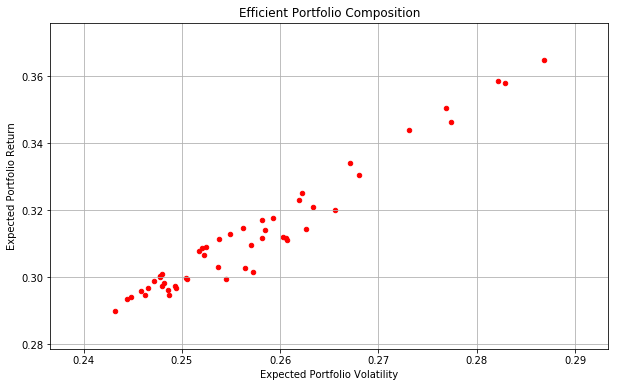

In [27]:
efficient_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="red",
    figsize=(10,6)
)
plt.grid(True)
plt.title("Efficient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
#plt.xlim(.05,.25)
#plt.ylim(-.1, .25)


Text(0, 0.5, 'Expected Portfolio Return')

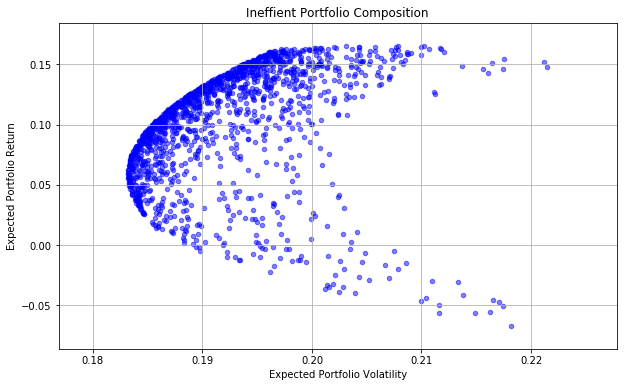

In [28]:
remaining_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="blue",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
#plt.xlim(.05,.50)
#plt.ylim(-.1, .25)

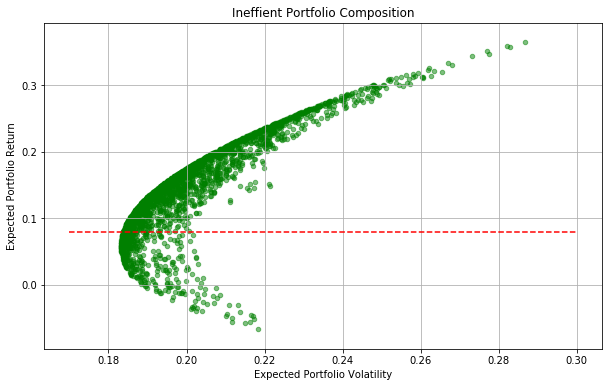

In [31]:
all_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="green",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.hlines(.08, .17, .3, linestyle="dashed", colors="red")
#plt.xlim(.15,.30)
#plt.ylim(-.1, .5)